In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


page_views_df = pd.read_csv('/Users/lulu/Documents/datafest/samples/page_views.csv')

print(page_views_df.head())

                                          book release  \
0  College / Statistics and Data Science (ABC)    v5.0   
1  College / Statistics and Data Science (ABC)    v5.0   
2  College / Statistics and Data Science (ABC)    v5.0   
3  College / Statistics and Data Science (ABC)    v5.0   
4  College / Statistics and Data Science (ABC)    v5.0   

                                             chapter  \
0  Chapter 1 - Welcome to Statistics: A Modeling ...   
1  Chapter 1 - Welcome to Statistics: A Modeling ...   
2  Chapter 1 - Welcome to Statistics: A Modeling ...   
3  Chapter 1 - Welcome to Statistics: A Modeling ...   
4  Chapter 1 - Welcome to Statistics: A Modeling ...   

                              page  chapter_number  section_number  \
0      1.3 Doing Statistics with R             1.0             3.0   
1      1.3 Doing Statistics with R             1.0             3.0   
2      1.3 Doing Statistics with R             1.0             3.0   
3  1.4 Introduction to R Functions

/var/folders/0j/ykjr_7vx3mx7s87yr78wnv2w0000gn/T/ipykernel_13752/483255238.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  page_views_df = pd.read_csv('/Users/lulu/Documents/datafest/samples/page_views.csv')


In [17]:
responses_df = pd.read_csv('/Users/lulu/Documents/datafest//samples/responses.csv')
print(responses_df.head())

/var/folders/0j/ykjr_7vx3mx7s87yr78wnv2w0000gn/T/ipykernel_13752/3052874610.py:1: DtypeWarning: Columns (34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  responses_df = pd.read_csv('/Users/lulu/Documents/datafest//samples/responses.csv')


                                                book    release  \
0  College / Advanced Statistics and Data Science...  v5.0-exp2   
1  College / Advanced Statistics and Data Science...  v5.0-exp2   
2  College / Advanced Statistics and Data Science...  v5.0-exp2   
3  College / Advanced Statistics and Data Science...  v5.0-exp2   
4  College / Advanced Statistics and Data Science...  v5.0-exp2   

                                             chapter  \
0  Chapter 1 - Welcome to Statistics: A Modeling ...   
1  Chapter 1 - Welcome to Statistics: A Modeling ...   
2  Chapter 1 - Welcome to Statistics: A Modeling ...   
3  Chapter 1 - Welcome to Statistics: A Modeling ...   
4  Chapter 1 - Welcome to Statistics: A Modeling ...   

                          page  chapter_number  section_number  review_flag  \
0  1.3 Doing Statistics with R             1.0             3.0        False   
1  1.3 Doing Statistics with R             1.0             3.0        False   
2  1.3 Doing Statistics

In [13]:
page_views_df_filtered = page_views_df[page_views_df['student_id'] == '953768c5-32fa-4190-8fee-1da82d8710bc']
# print(page_views_df_filtered)

responses_df_filtered = responses_df[responses_df['student_id'] == '953768c5-32fa-4190-8fee-1da82d8710bc']
result = pd.merge(page_views_df_filtered, responses_df_filtered, on='student_id')

print(result)
result.to_csv('grouped.csv', index=False)

                                             book_x release_x  \
0       College / Statistics and Data Science (ABC)      v5.0   
1       College / Statistics and Data Science (ABC)      v5.0   
2       College / Statistics and Data Science (ABC)      v5.0   
3       College / Statistics and Data Science (ABC)      v5.0   
4       College / Statistics and Data Science (ABC)      v5.0   
...                                             ...       ...   
135809  College / Statistics and Data Science (ABC)      v5.0   
135810  College / Statistics and Data Science (ABC)      v5.0   
135811  College / Statistics and Data Science (ABC)      v5.0   
135812  College / Statistics and Data Science (ABC)      v5.0   
135813  College / Statistics and Data Science (ABC)      v5.0   

                                                chapter_x  \
0       Chapter 1 - Welcome to Statistics: A Modeling ...   
1       Chapter 1 - Welcome to Statistics: A Modeling ...   
2       Chapter 1 - Welcome to Stati

In [49]:
!cd '/Users/lulu/Documents/datafest'

In [168]:
checkpoints_df = pd.read_csv('/Users/lulu/Documents/datafest/samples/checkpoints_eoc.csv')


checkpoints_df['EOC'].describe()  # Summary statistics for continuous variables

checkpoints_df['EOC'].value_counts()  # Frequency count for categorical variables

EOC
0.500000    35
0.333333    21
0.666667    19
1.000000    16
0.750000    14
            ..
0.306122     1
0.280000     1
0.872549     1
0.852174     1
0.675214     1
Name: count, Length: 1409, dtype: int64

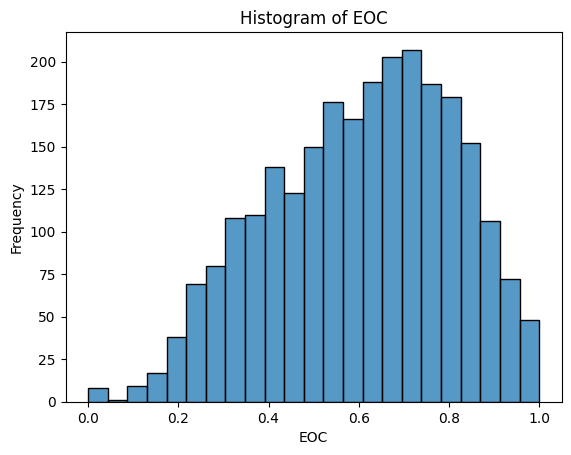

In [28]:
sns.histplot(checkpoints_df['EOC'])
plt.title('Histogram of EOC')
plt.xlabel('EOC')
plt.ylabel('Frequency')
plt.show()

In [34]:
items_df = pd.read_csv('/Users/lulu/Documents/datafest/samples/items.csv')
item_type = items_df['item_type'].unique()
review_flag = items_df['review_flag'].unique()
lrn_type =  items_df['lrn_type'].unique()


['learnosity' 'learnosity-activity' 'code']


In [116]:
joined = pd.merge(checkpoints_df, items_df, on='class_id', how='outer')
joined = joined[['item_type', 'review_flag', 'lrn_type', 'EOC']].dropna()
# drop_duplicates(keep='last')


# joined.to_csv('/Users/lulu/Documents/datafest/joined_ECO.csv', index=False)

In [117]:
data = {
    'item_type': joined['item_type'],
    'review_flag': joined['review_flag'],
    'lrn_type': joined['lrn_type'],
    'ECO': joined['EOC']
}
df = pd.DataFrame(data)

df['item_type'] = df['item_type'].astype('category')
df['review_flag'] = df['review_flag'].astype('category')
df['lrn_type'] = df['lrn_type'].astype('category')

# Use pd.get_dummies to one-hot encode the categorical variables
df_encoded = pd.get_dummies(df, columns=['item_type', 'review_flag', 'lrn_type'], drop_first=True)
print(df_encoded.head())
df_encoded.to_csv('/Users/lulu/Documents/datafest/df_encoded.csv', index=False)

        ECO  item_type_learnosity-activity  review_flag_True  \
0  0.921053                          False             False   
1  0.921053                          False             False   
2  0.921053                          False             False   
3  0.921053                          False             False   
4  0.921053                          False             False   

   lrn_type_choicematrix  lrn_type_clozeassociation  lrn_type_formulaV2  \
0                  False                      False               False   
1                  False                      False               False   
2                  False                      False               False   
3                  False                      False               False   
4                  False                      False               False   

   lrn_type_imageclozeassociation  lrn_type_mcq  lrn_type_plaintext  \
0                           False          True               False   
1                     

In [118]:
df_encoded = df_encoded.map(lambda x: int(x) if isinstance(x, bool) else x)
print(df_encoded.head())

        ECO  item_type_learnosity-activity  review_flag_True  \
0  0.921053                              0                 0   
1  0.921053                              0                 0   
2  0.921053                              0                 0   
3  0.921053                              0                 0   
4  0.921053                              0                 0   

   lrn_type_choicematrix  lrn_type_clozeassociation  lrn_type_formulaV2  \
0                      0                          0                   0   
1                      0                          0                   0   
2                      0                          0                   0   
3                      0                          0                   0   
4                      0                          0                   0   

   lrn_type_imageclozeassociation  lrn_type_mcq  lrn_type_plaintext  \
0                               0             1                   0   
1                     

In [119]:
import statsmodels.api as sm

# Separate the predictors and the response
X = df_encoded.drop('ECO', axis=1)  # predictors
y = df_encoded['ECO']               # response

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    ECO   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.558
Date:                Sat, 27 Apr 2024   Prob (F-statistic):              0.112
Time:                        16:59:25   Log-Likelihood:             1.4077e+05
No. Observations:              481520   AIC:                        -2.815e+05
Df Residuals:                  481509   BIC:                        -2.814e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

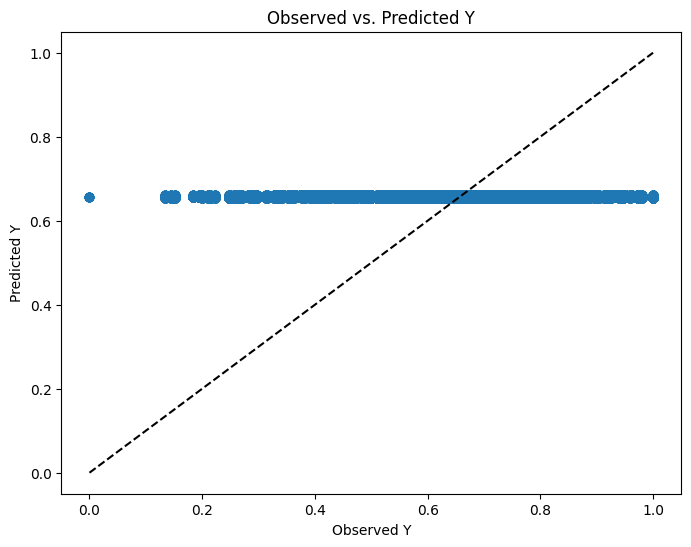

In [124]:
# df_encoded['Y_pred'] = model.predict(X)
# plt.figure(figsize=(10, 6))
# plt.scatter(df_encoded['X'], df_encoded['Y'], color='blue', label='Observed data')  # Plot the observed data
# plt.plot(df_encoded['X'], df_encoded['Y_pred'], color='red', label='Fitted line')   # Plot the fitted line
# plt.title('Scatter Plot with Fitted Line')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.legend()
# plt.show()


df_encoded['Predicted_Y'] = model.predict(X)

# Plotting observed vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(df_encoded['ECO'], df_encoded['Predicted_Y'], alpha=0.6)
plt.plot([df_encoded['ECO'].min(), df_encoded['ECO'].max()], [df_encoded['ECO'].min(), df_encoded['ECO'].max()], 'k--') # Diagonal line
plt.title('Observed vs. Predicted Y')
plt.xlabel('Observed Y')
plt.ylabel('Predicted Y')
plt.show()

In [137]:
page_views_df = pd.read_csv('/Users/lulu/Documents/datafest/samples/page_views.csv')
page_views_df = page_views_df.groupby('student_id')
page_views_df = page_views_df.groupby('chapter_number')
print(page_views_df.head())
# for name, group in page_views_df:
#     print(f"Group name: {name}")
#     print(group)
# page_views_df.to_csv('/Users/lulu/Documents/datafest/page_views_df.csv', index=False)


                                          book release  \
0  College / Statistics and Data Science (ABC)    v5.0   
1  College / Statistics and Data Science (ABC)    v5.0   
2  College / Statistics and Data Science (ABC)    v5.0   
3  College / Statistics and Data Science (ABC)    v5.0   
4  College / Statistics and Data Science (ABC)    v5.0   

                                             chapter  \
0  Chapter 1 - Welcome to Statistics: A Modeling ...   
1  Chapter 1 - Welcome to Statistics: A Modeling ...   
2  Chapter 1 - Welcome to Statistics: A Modeling ...   
3  Chapter 1 - Welcome to Statistics: A Modeling ...   
4  Chapter 1 - Welcome to Statistics: A Modeling ...   

                              page  chapter_number  section_number  \
0      1.3 Doing Statistics with R             1.0             3.0   
1      1.3 Doing Statistics with R             1.0             3.0   
2      1.3 Doing Statistics with R             1.0             3.0   
3  1.4 Introduction to R Functions

/var/folders/0j/ykjr_7vx3mx7s87yr78wnv2w0000gn/T/ipykernel_13752/722315364.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  page_views_df = pd.read_csv('/Users/lulu/Documents/datafest/samples/page_views.csv')


In [155]:
engagement_df = pd.read_csv('/Users/lulu/Documents/datafest/engagement_score.csv')
engagement_df = engagement_df.groupby(['student_id', 'chapter_number'])['engagement_score'].sum().reset_index()
# engagement_df.to_csv('/Users/lulu/Documents/datafest/engagement_df.csv', index=False)

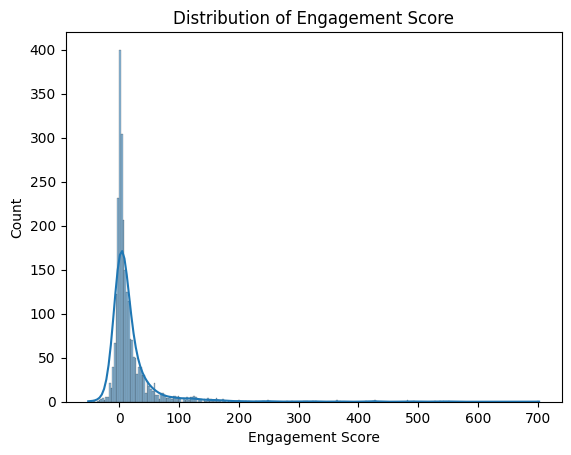

In [156]:
sns.histplot(engagement_df['engagement_score'], kde=True)
plt.title('Distribution of Engagement Score')
plt.xlabel('Engagement Score')
plt.show()

In [159]:
learning_time_table = pd.read_csv('/Users/lulu/Documents/datafest/learning_time_table2.csv')

In [178]:
combined = pd.merge(learning_time_table, engagement_df, on=['student_id', 'chapter_number'])


# combined.to_csv('/Users/lulu/Documents/datafest/combined_final.csv', index=False)

ValueError: could not convert string to float: '001824fb-a2fd-431d-aef6-7a1250d97a62'

In [167]:
data = {
    'learning_duration': combined['learning_duration_rounded'],
    'engagement_score': combined['engagement_score']
    
}
df = pd.DataFrame(data)

# Separate the predictors and the response
X = df['learning_duration']  # predictors
y = df['engagement_score']               # response

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       engagement_score   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     11.90
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           0.000572
Time:                        20:57:36   Log-Likelihood:                -12405.
No. Observations:                2319   AIC:                         2.481e+04
Df Residuals:                    2317   BIC:                         2.483e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                18.0555      1.19

                            engaged  idle_brief  idle_long  off_page_brief  \
engaged                    1.000000    0.620653   0.237722        0.482219   
idle_brief                 0.620653    1.000000   0.265117        0.460366   
idle_long                  0.237722    0.265117   1.000000        0.215461   
off_page_brief             0.482219    0.460366   0.215461        1.000000   
off_page_long              0.420279    0.415302   0.262567        0.549273   
chapter_number            -0.196813   -0.132021  -0.026637       -0.134587   
learning_duration_rounded  0.144219    0.255213   0.081787        0.182093   
EOC                        0.163635    0.076581   0.050212        0.163270   
n_possible                 0.533022    0.337141   0.200642        0.337419   
n_correct                  0.527095    0.316745   0.199177        0.380707   
n_attempt                  0.434788    0.316345   0.098334        0.284251   
engagement_score           0.549182    0.336316   0.099824      

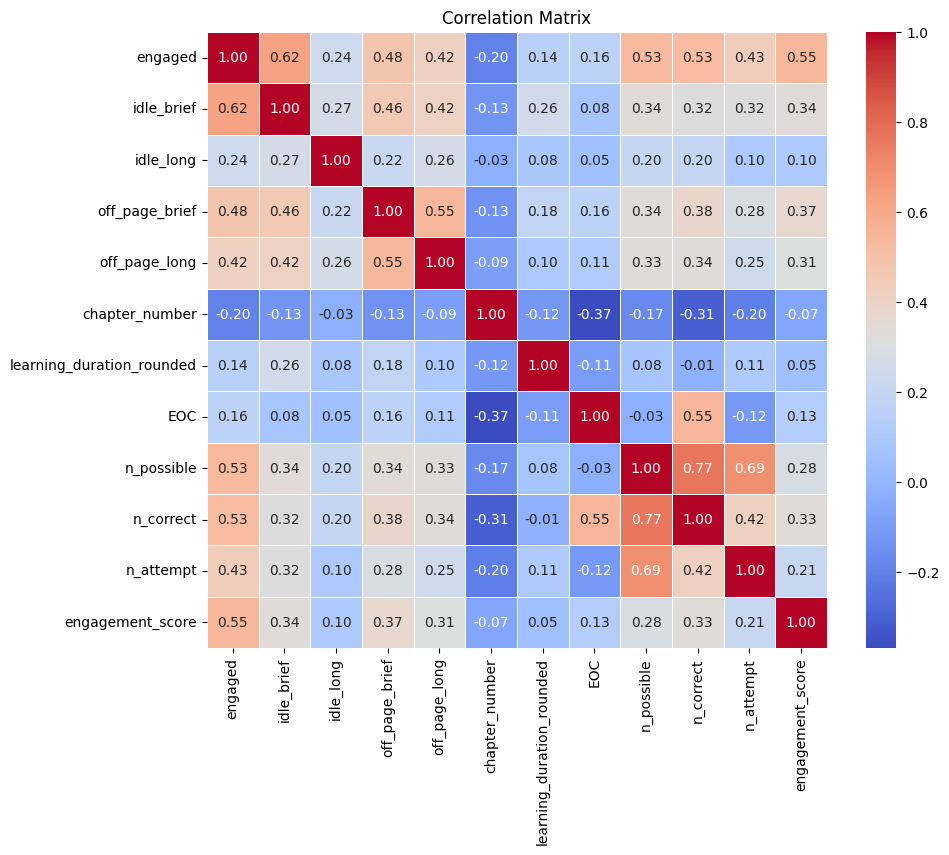

In [188]:
eoc_duration = pd.merge(learning_time_table, checkpoints_df, on=['student_id', 'chapter_number']).dropna()
eoc_duration.to_csv('/Users/lulu/Documents/datafest/eoc_duration.csv', index=False)

total_combined = pd.merge(eoc_duration, engagement_df, on=['student_id', 'chapter_number']).dropna()
total_combined.to_csv('/Users/lulu/Documents/datafest/total_combined.csv', index=False)
total_combined.drop(['student_id', 'book_x', 'book_y', 'submit', 'access', 'class_id'], axis=1, inplace=True)
print(total_combined.corr())
plt.figure(figsize=(10, 8))  # Set the figure size for better readability
sns.heatmap(total_combined.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [215]:
import plotly.express as px

# plt.scatter(total_combined['EOC'], total_combined['engagement_score'], color= total_combined['chapter_number'])

fig = px.scatter(df, x=total_combined['EOC'], y=total_combined['engagement_score'], color=total_combined['chapter_number'], 
                 title='Interactive Scatter Plot Colored by Category',
                 labels={'X': 'EOC', 'Y': 'engagement_score'})  # Customize axis labels

fig.update_xaxes(range=[0.6, 1])
fig.update_yaxes(range=[0, 400])
fig.show()


In [212]:
fig = px.scatter(df, x=total_combined['n_attempt'], y=total_combined['EOC'], color=total_combined['chapter_number'], 
                 title='Interactive Scatter Plot Colored by Category',
                 labels={'EOC': 'EOC', 'SCORE': 'engagement_score'})  # Customize axis labels

fig.show()

In [230]:
fig = px.scatter(df, x=total_combined['n_attempt'], y=total_combined['EOC'], color=total_combined['chapter_number'], 
                 title='Interactive Scatter Plot Colored by Category',
                 labels={'X': 'n_attempt', 'y': 'EOC'})  # Customize axis labels
fig.update_xaxes(range=[0, 250])
fig.show()

In [228]:

fig = px.scatter(total_combined, x=total_combined['engaged'], y=total_combined['EOC'], color=total_combined['chapter_number'], 
                 title='Interactive Scatter Plot Colored by Category',
                 labels={'X': 'engaged', 'y': 'EOC'})  # Customize axis labels
fig.update_xaxes(range=[0, 10000000])
fig.show()

In [177]:
data = {
    'learning_duration': eoc_duration['learning_duration_rounded'],
    'EOC': eoc_duration['EOC']
    
}
df = pd.DataFrame(data)
print(df.corr())
# Separate the predictors and the response
X = df['learning_duration']  # predictors
y = df['EOC']               # response

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the statistics
print(model.summary())

                   learning_duration       EOC
learning_duration           1.000000 -0.104772
EOC                        -0.104772  1.000000
                            OLS Regression Results                            
Dep. Variable:                    EOC   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     25.78
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           4.12e-07
Time:                        21:31:25   Log-Likelihood:                 401.04
No. Observations:                2325   AIC:                            -798.1
Df Residuals:                    2323   BIC:                            -786.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0